<a href="https://colab.research.google.com/github/Imsurajr/OpenCV/blob/main/ImageSegmentationAndImageGenerationAndKMedioids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import cv2
import matplotlib.pyplot as plt


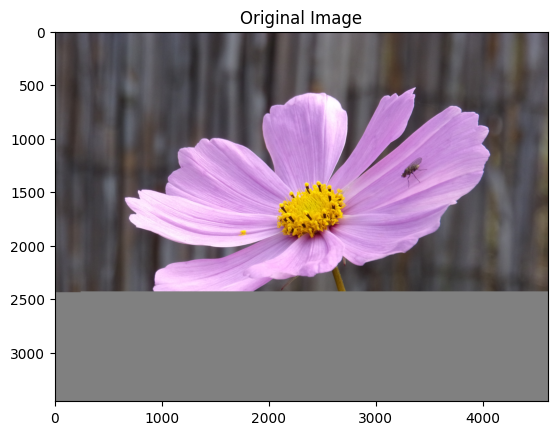

In [ ]:
#Reading the image
img = cv2.imread("sample.jpg", cv2.IMREAD_UNCHANGED)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title("Original Image")
plt.imshow(img)


In [ ]:
print(img.shape)
pixel_values = np.float32(img.reshape((-1, 3)))
print(pixel_values.shape)

(3456, 4608, 3)
(15925248, 3)


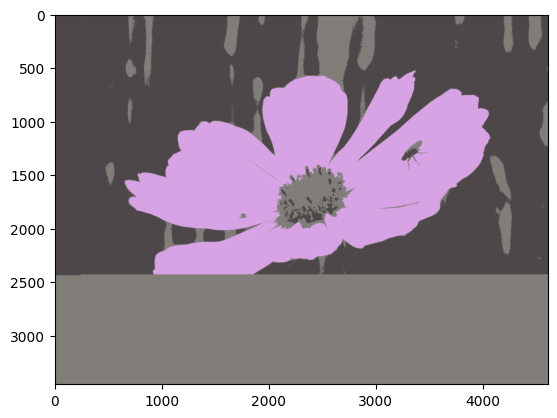

In [ ]:
# Stopping Criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Number of clusters = 3
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert back to 8-bit values
centers = np.uint8(centers)
# Flatten the labels array
labels = labels.flatten()

# Final Image Formation
# Convert all pixels to color of the centroid
segmented_image = centers[labels.flatten()]
segmented_image = segmented_image.reshape(img.shape)
plt.imshow(segmented_image)


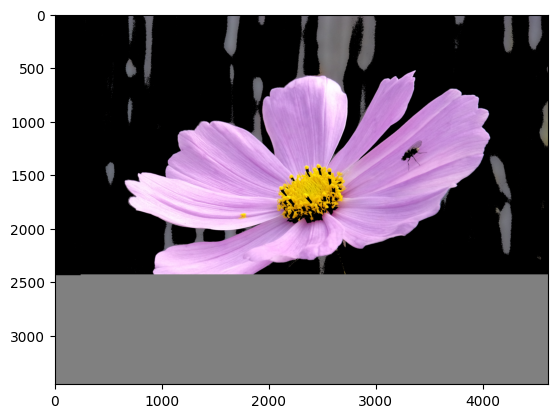

In [ ]:
# Disable the cluster number 0, 1, and 2 (turning the pixel into black)
maskedimage0 = np.copy(img)
maskedimage1 = np.copy(img)
maskedimage2 = np.copy(img)
# Convert to the shape of a vector of pixel values
maskedimage0 = maskedimage0.reshape((-1, 3))
maskedimage1 = maskedimage1.reshape((-1, 3))
maskedimage2 = maskedimage2.reshape((-1, 3))
# Disabling cluster 0
cluster = 0
maskedimage0[labels == cluster] = [0, 0, 0]
# Disabling cluster 1
cluster = 1
maskedimage1[labels == cluster] = [0, 0, 0]
# Disabling cluster 2
cluster = 2
maskedimage2[labels == cluster] = [0, 0, 0]
# Convert back to original shape
maskedimage0 = maskedimage0.reshape(img.shape)
maskedimage1 = maskedimage1.reshape(img.shape)
maskedimage2 = maskedimage2.reshape(img.shape)

plt.imshow(maskedimage0)
plt.show()

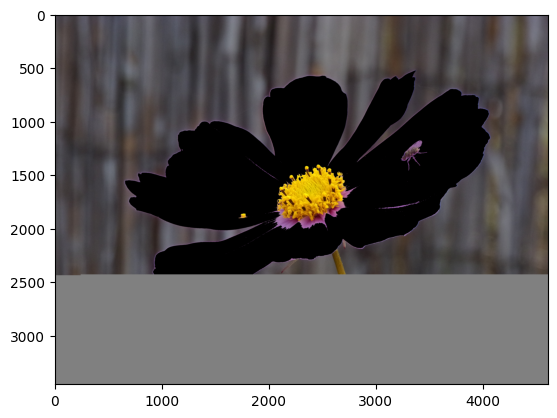

In [ ]:

plt.imshow(maskedimage1)
plt.show()


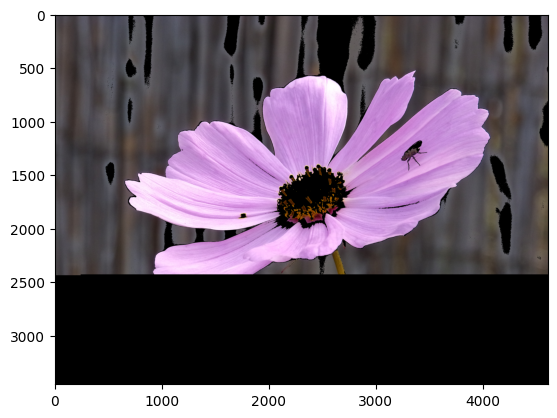

In [ ]:

plt.imshow(maskedimage2)
plt.show()
